# 리뷰에서 불만의 원인

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)


In [2]:
origin_reviews_path = r"../../downloads/olist/olist_order_reviews_dataset.csv"
origin_order_items_dataset_path = r"../../downloads/olist/olist_order_items_dataset.csv"

eng_reviews_title_path = r"../../artifact/reviews_with_senti/eng_kor_title_with_senti.csv"
eng_reviews_message_path = r"../../artifact/reviews_with_senti/eng_kor_message_with_senti.csv"


for path in [
    origin_reviews_path,
    origin_order_items_dataset_path,
    eng_reviews_title_path,
    eng_reviews_message_path]:
    print(os.path.exists(path))

True
True
True
True


In [ ]:
origin_reviews_df = pd.read_csv(origin_reviews_path)
origin_order_items_dataset_df = pd.read_csv(origin_order_items_dataset_path)

In [61]:
score_1_reviews = origin_reviews_df[origin_reviews_df.review_score == 5]
score_1_reviews.shape

(57328, 7)

In [62]:
eng_reviews_title = pd.read_csv(eng_reviews_title_path)
eng_reviews_message = pd.read_csv(eng_reviews_message_path)

In [63]:
score_1_titiles = eng_reviews_title[eng_reviews_title.review_id.isin(score_1_reviews.review_id)][['review_id', 'p2e']]
score_1_messages = eng_reviews_message[eng_reviews_message.review_id.isin(score_1_reviews.review_id)][['review_id', 'p2e']]

In [64]:
eng_score_1_reviews = pd.concat([score_1_titiles, score_1_messages], axis=0)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/jmhwang/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jmhwang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jmhwang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jmhwang/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


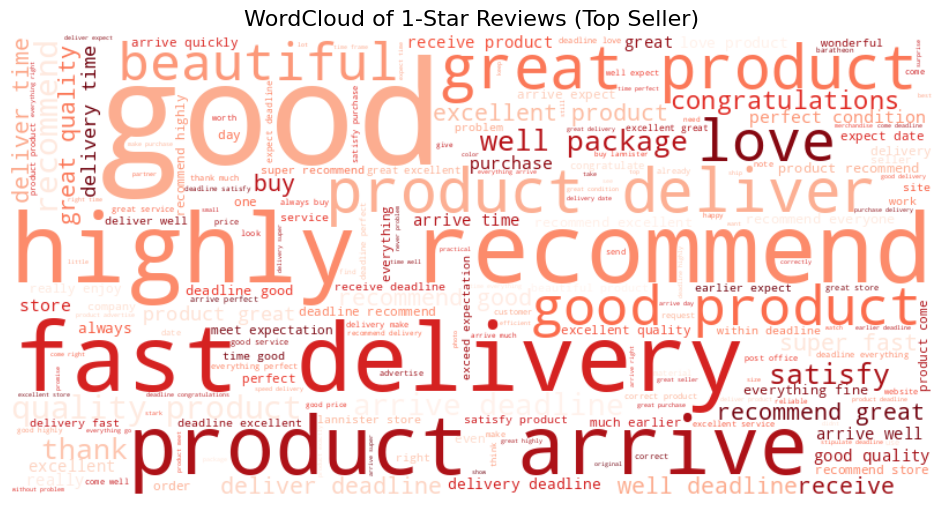

In [65]:
# Import libraries
import re
import sys
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required NLTK data
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# # Setup NLTK data path (if needed)
# nltk.data.path.append('/home/jmhwang/nltk_data')
# sys.path.append("/home/jmhwang/nltk_data")

# Initialize components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define functions
def lemmatize_tokens(tokens):
    """Apply lemmatization to tokens"""
    return [lemmatizer.lemmatize(token, pos='v') for token in tokens]

def preprocess(text):
    """Preprocess text: lowercase, remove non-alphabetic chars, tokenize, remove stopwords, lemmatize"""
    if not isinstance(text, str):
        return ''
    
    # Convert to lowercase and remove non-alphabetic characters
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords and short words
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    
    # Lemmatize
    tokens = lemmatize_tokens(tokens)
    
    return ' '.join(tokens)

# Process text data
text_corpus = eng_score_1_reviews['p2e'].dropna().apply(preprocess).str.cat(sep=' ')

# Generate word cloud
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='Reds'
).generate(text_corpus)

# Visualize
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of 1-Star Reviews (Top Seller)", fontsize=16)
plt.show()

In [66]:
from collections import Counter

# 모든 토큰 모으기
tokens = text_corpus.split()

# 빈도 계산
word_freq = Counter(tokens)
len(word_freq)

4099

In [67]:
# 상위 20개 키워드 추출
top_words = word_freq.most_common(20)
words, freqs = zip(*top_words)

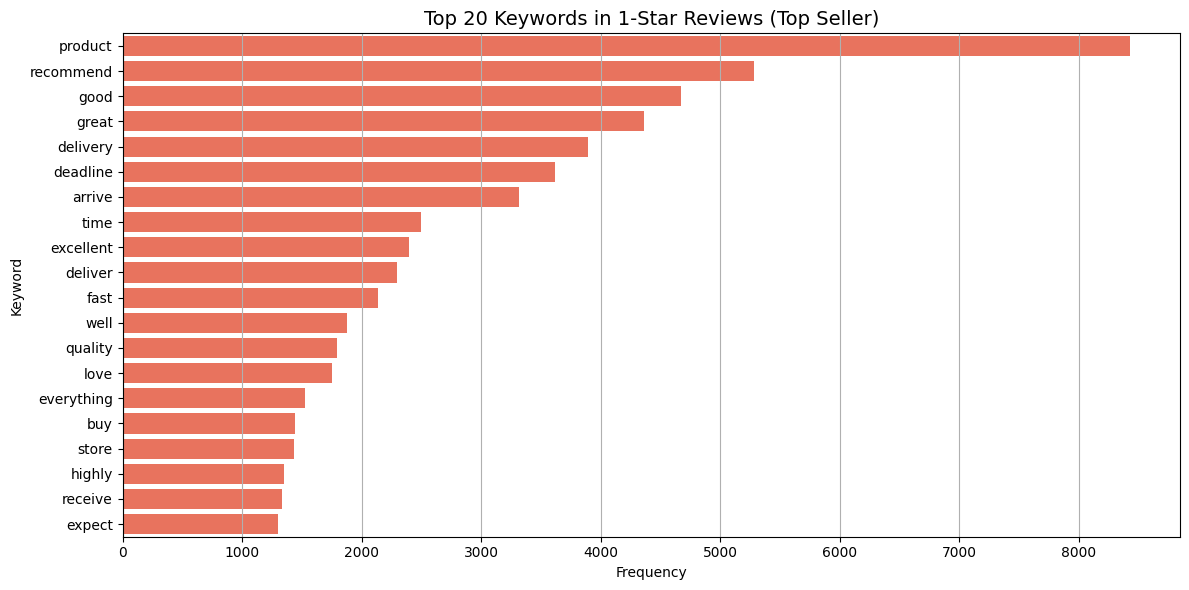

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=list(freqs), y=list(words), color='tomato')  # 수평 막대
plt.title("Top 20 Keywords in 1-Star Reviews (Top Seller)", fontsize=14)
plt.xlabel("Frequency")
plt.ylabel("Keyword")
plt.grid(axis='x')
plt.tight_layout()
plt.show()
